Assignment #5

Regression problem project on california_housing_train.csv from google colaboratory

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn import linear_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
directory = os.path.join('sample_data', 'california_housing_train.csv') # Output: sample_data/california_housing_train.csv

if os.path.isfile(directory):
  print("File ditemukan")


dataset = pd.read_csv(directory)
dataset.head()

File ditemukan


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Plotting

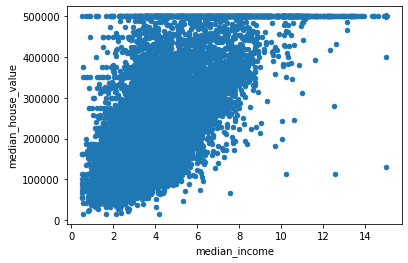

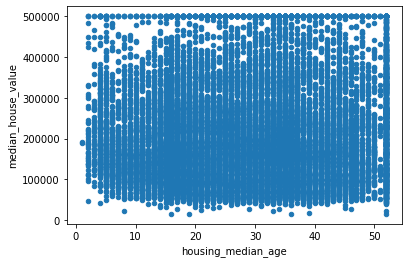

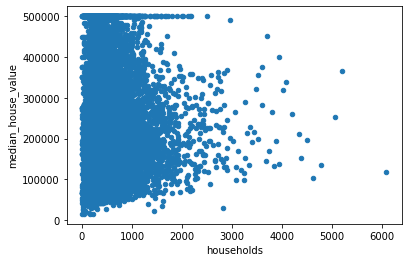

In [3]:
#MEDIAN_HOUSE_VALUE & TOTAL_ROOMS
dataset.plot(kind='scatter', x='median_income', y='median_house_value')
plt.show()
dataset.plot(kind='scatter', x='housing_median_age', y='median_house_value')
plt.show()
dataset.plot(kind='scatter', x='households', y='median_house_value')
plt.show()


# Training & Testing RandomForestRegression

In [4]:
scaler= preprocessing.StandardScaler()
features_used = dataset.drop(['median_house_value'],axis=1)
label = dataset['median_house_value']

features_scaled = scaler.fit_transform(features_used.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

## Split Dataset 90/10

In [5]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.1)

In [6]:
forest_reg= RandomForestRegressor()
forest_reg.fit(feature_train,label_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.972318685533333


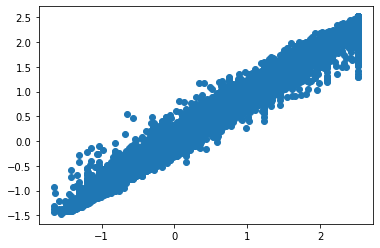

In [7]:
#Checking in training dataset
r2= r2_score(forest_reg.predict(feature_train), label_train)
print(r2)
predictions = forest_reg.predict(feature_train)
plt.scatter(label_train, predictions)

0.7288573932689209


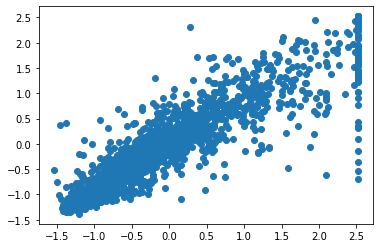

In [8]:
#Checking in testing dataset
r2= r2_score(forest_reg.predict(feature_test), label_test)
print(r2)
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions)

## Split Dataset 85/15

In [9]:
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.15)

In [10]:
forest_reg= RandomForestRegressor()
forest_reg.fit(feature_train,label_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.9712031766361615


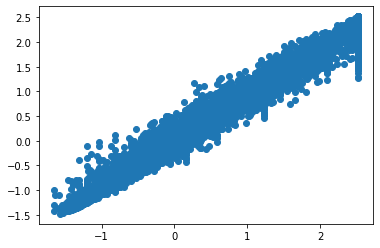

In [11]:
#Checking in training dataset
r2= r2_score(forest_reg.predict(feature_train), label_train)
print(r2)
predictions = forest_reg.predict(feature_train)
plt.scatter(label_train, predictions)

0.799234874558671


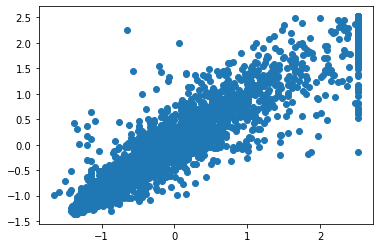

In [12]:
#Checking in testing dataset
r2= r2_score(forest_reg.predict(feature_test), label_test)
print(r2)
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions)

## Split Dataset 80/20

In [13]:
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.20)

In [14]:
forest_reg= RandomForestRegressor()
forest_reg.fit(feature_train,label_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.9716670522277918


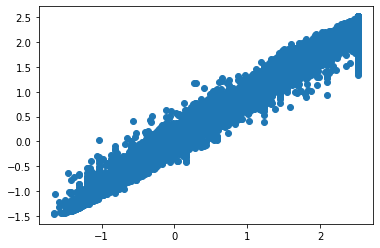

In [15]:
#Checking in training dataset
r2= r2_score(forest_reg.predict(feature_train), label_train)
print(r2)
predictions = forest_reg.predict(feature_train)
plt.scatter(label_train, predictions)

0.7363135235074869


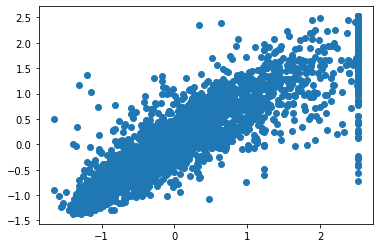

In [16]:
#Checking in testing dataset
r2= r2_score(forest_reg.predict(feature_test), label_test)
print(r2)
predictions = forest_reg.predict(feature_test)
plt.scatter(label_test, predictions)

##Kesimpulan
Pada percobaan diatas, tiap training dengan komposisi yang berbeda akan menghasilkan nilai r2 yang berbeda.

Pada komposisi 90/10, didapatkan hasil r2 pada dataset_test sebesar 0.72

Pada komposisi 85/15, didapatkan hasil r2 pada dataset_test sebesar 0.79

Pada komposisi 80/20, didapatkan hasil r2 pada dataset_test sebesar 0.73

Maka, kesimpulannya didapatkan nilai r2 terbaik pada komposisi 85/15 dengan 0.79, sehingga banyaknya dataset_train yang digunakan dan proses training yang dijalankan dapat mempengaruhi hasil prediksi

# SVR & LINEAR REGRESSION

In [17]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.2)

In [18]:
svr_poly = SVR(kernel='poly', gamma='auto', degree=3, epsilon=.1,coef0=1)

In [19]:
svr_poly.fit(feature_train,label_train)

SVR(C=1.0, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.42125966221621725


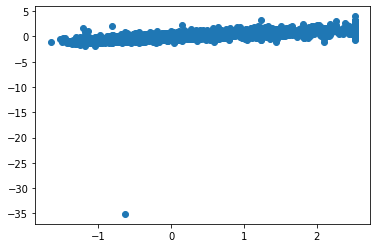

In [20]:
#SVR-POLY
r2= r2_score(svr_poly.predict(feature_test), label_test)
print(r2)
predictions = svr_poly.predict(feature_test)
plt.scatter(label_test, predictions)

In [21]:
#LINEAR REGRESSION
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.4399557689753012


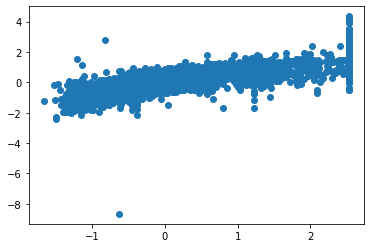

In [22]:
r2=r2_score(linear_reg.predict(feature_test), label_test)
print(r2)
predictions = linear_reg.predict(feature_test)
plt.scatter(label_test, predictions)

## Kesimpulan

Pada percobaan diatas yang menggunakan algoritma SVR polynomial didapatkan score r2 sebesar 0.421
Sedangkan, untuk Linear Regression didapatkan score r2 sebesar 0.439

Maka, dapat disimpulkan bahwa penggunaan algoritma SVR Polynomial dan Linear Regression pada dataset ini tidak/kurang optimal karena score r2 masing-masing dibawah 0,5 . Walaupun, didapati algoritma Linear Regression mendapat hasil r2 yang lebih baik dari SVR-Polynomial